## Customer Segmentation Report

Customer segmentationn is a way to identify groups of similar customers. Customer can be segmented on a wide variery of characteristics, such as demographic information, purchase behaviour, and attitudes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('customer_data.csv')
df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3643 non-null   int64  
 1   Recency        3643 non-null   int64  
 2   Frequency      3643 non-null   int64  
 3   MonetaryValue  3643 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 114.0 KB


### Exploring the Data

* Select the column that you want to inspect
* Print desciptive statisctics using the `describe()`

Printing descriotive statisctics is helpful because K-means clustering has several key assumptions that can be revealed vis this exploration:
1. There in nonskewness to the data.
2. The variables have the same average values
3. The variables have the same variance.

In [4]:
# Select columns for clustering 
columns_for_clustering = ['Recency', 'Frequency', 'MonetaryValue']

# Create new DataFrame with clustering variables
df_features = df[columns_for_clustering]

# Print a summary of descriptive statistics
df_features.describe()

,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


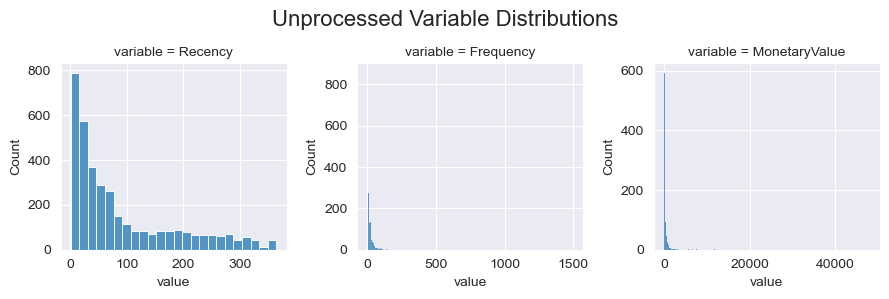

In [5]:
# Plot the distributions of the selected variables
g = sns.FacetGrid( df_features.melt(), col = 'variable', sharey = False, sharex = False)

# Apply a histogram to the facet grid
g.map(sns.histplot, "value")

# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top = 0.8)

# Create a title
g.fig.suptitle("Unprocessed Variable Distributions", fontsize = 16)

plt.show()

Before proceeding, it is crucial to ensure that all columns selected for clustering are numeric. 

In [6]:
all([pd.api.types.is_numeric_dtype(df_features[col]) for col in columns_for_clustering])

True

### Pre-processing the Data

Based on the grids above, if there is a skew, you will have to complete this step which removes the skew and cenetr the variables. This is the case for the placeholder dataset used in this template and will likely be the case for your data.

* First, a log transforamtion is aplied to the data using `numpy` `log()` function. A log transformation unskews the data in preparation for clustering.
* Next, the `StandardScaler()` from `sklearn.preprocessing` fits and transforms the log-transformed data. this centers and scales the data in further preparation for clustering.
* Finally, a new DataFrame is created and visualized again to confirm the results.

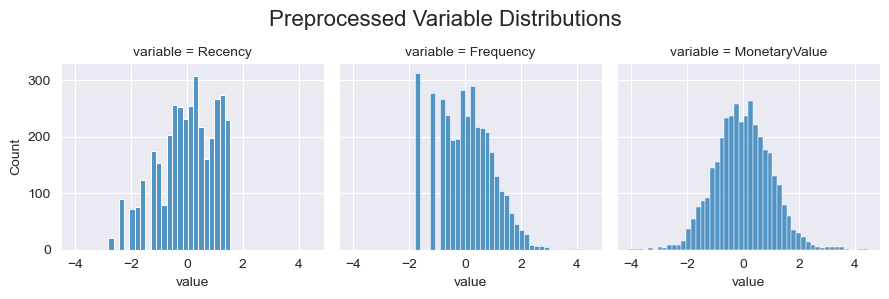

In [7]:
# Perform a log transformation of the data to unskew the data
df_log = np.log(df_features)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(df_log)

# Scale and center the data
df_normalized = scaler.transform(df_log)

# Create a pandas DataFrame of the processed data
df_processed = pd.DataFrame(data = df_normalized, index= df_features.index, columns = df_features.columns)

# Plot the distributions of the selected variables
g = sns.FacetGrid(df_processed.melt(), col = "variable")
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle("Preprocessed Variable Distributions", fontsize = 16)
plt.show()

In [8]:
df_processed.head()

,Recency,Frequency,MonetaryValue
0,-2.002202,0.865157,1.464940
1,-2.814518,3.815272,2.994692
2,-1.789490,1.189117,1.347598
3,-1.789490,0.546468,0.500595
4,0.337315,0.020925,0.037943


### Choosing the Number of Clusters

In [9]:
# Set the maximum number of clusters to plot
max_clusters = 10

# Initialize empty disctionary do store sum of squared errors
sse = {} # sum-of-squared errors

# Fit KMeans and calculate SSE for each k
for k in range(1, max_clusters):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters = k, random_state = 1, n_init = 10)
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_processed)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
    
sse

{1: 10928.999999999998,
 2: 5773.76182362359,
 3: 4421.510363126376,
 4: 3642.4783092844045,
 5: 3079.947449696402,
 6: 2756.284733364179,
 7: 2493.8327092300706,
 8: 2289.9040014892985,
 9: 2156.175332535242}

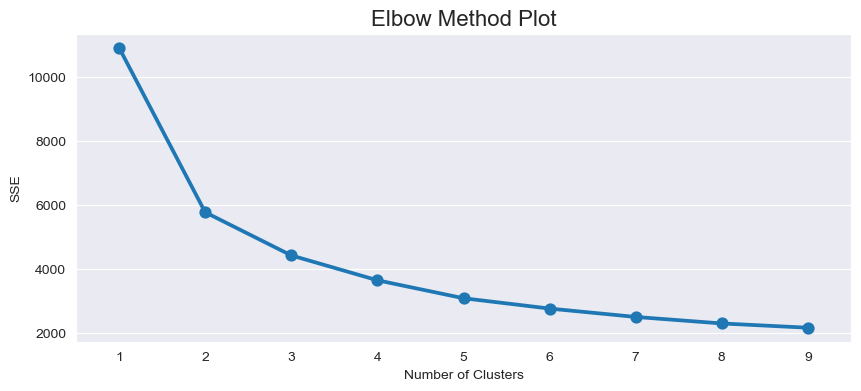

In [10]:
# Initialize a figure of set size
plt.figure(figsize = (10, 4))

# Create an elbow plot of SSE values for each key in the dictionary
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))

# Add labels to the plot
plt.title("Elbow Method Plot", fontsize = 16) # Add a title to the plot
plt.xlabel("Number of Clusters") # Add x-axis label
plt.ylabel("SSE") # Add y-axis label

plt.show()

### Clustering the Data

Set the optimal number of clusters based on the elbow plot above (k = 3). 

In [11]:
# Chosse number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit(df_processed)

# Extract cluster labels
cluster_labels  = kmeans.labels_

# Create a new DataFrame by adding a new cluster column to the original data
df_clusterd = df.assign(Cluster = cluster_labels)

df_clusterd

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12747,3,25,948.70,0
1,12748,1,888,7046.16,0
2,12749,4,37,813.45,0
3,12820,4,17,268.02,0
4,12822,71,9,146.15,2
...,...,...,...,...,...
3638,18280,278,2,38.70,1
3639,18281,181,2,31.80,1
3640,18282,8,2,30.70,1
3641,18283,4,152,432.93,0


### Inspecting the Clusters

#### Visualizing the Raw Values by Cluster

Analyze the unprocessed data by cluster. Use `gropuby()` with `size()` method to return the total number of rows per `Cluster`.

In [12]:
# Group the data by cluster and calculate the total number of rows per group
df_sizes = df_clusterd.groupby(['Cluster'], as_index =False).size()

# Inspect the raw counts
df_sizes

,Cluster,size
0,0,901
1,1,1156
2,2,1586


In [13]:
# Calculate the mean of feature columns by cluster
df_means = df_clusterd.groupby(['Cluster'])[df_features.columns].mean().round(0).reset_index()

df_means

,Cluster,Recency,Frequency,MonetaryValue
0,0,16.0,50.0,1051.0
1,1,167.0,3.0,53.0
2,2,77.0,12.0,216.0


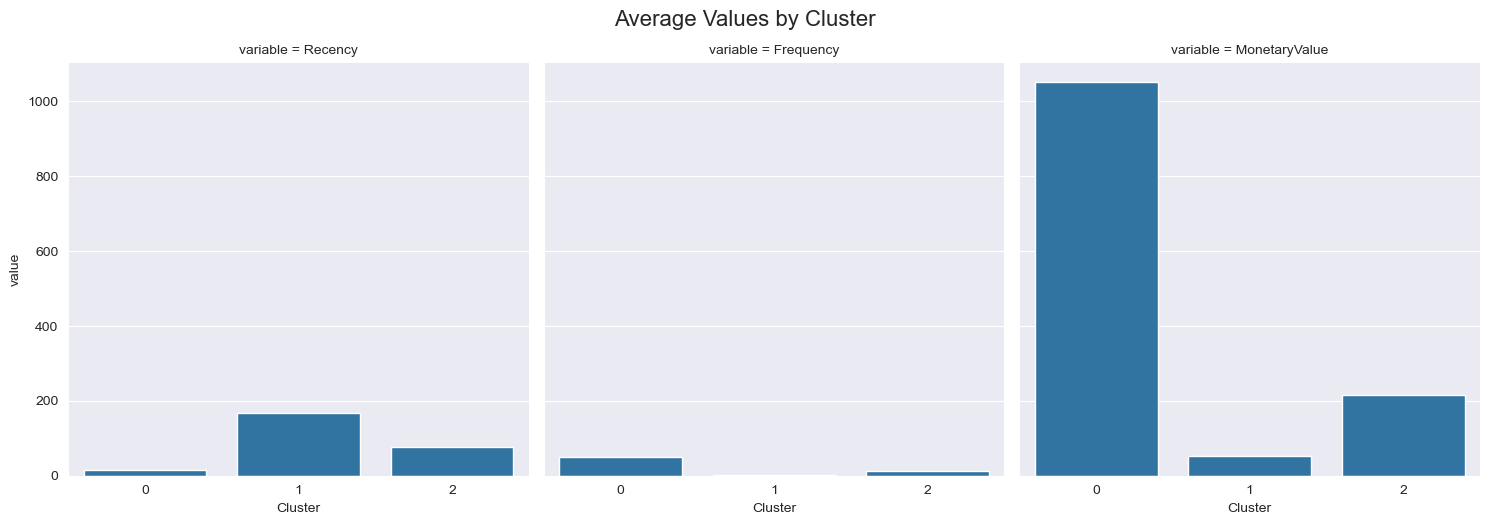

In [14]:
# Plot the distributions of the selected variables
sns.catplot(data = df_means.melt(id_vars = 'Cluster'),
            col = 'variable', x = 'Cluster', y = 'value', kind = 'bar')

# Add a title
plt.suptitle('Average Values by Cluster', y = 1.04, fontsize = 16)

plt.show()

#### Create a Snake Plot of the Clusters

Take the processed data and visualizes the differences between the clusters using a snake plot.
This can be helpful spot trends or key differences that would not be visible with the raw data.

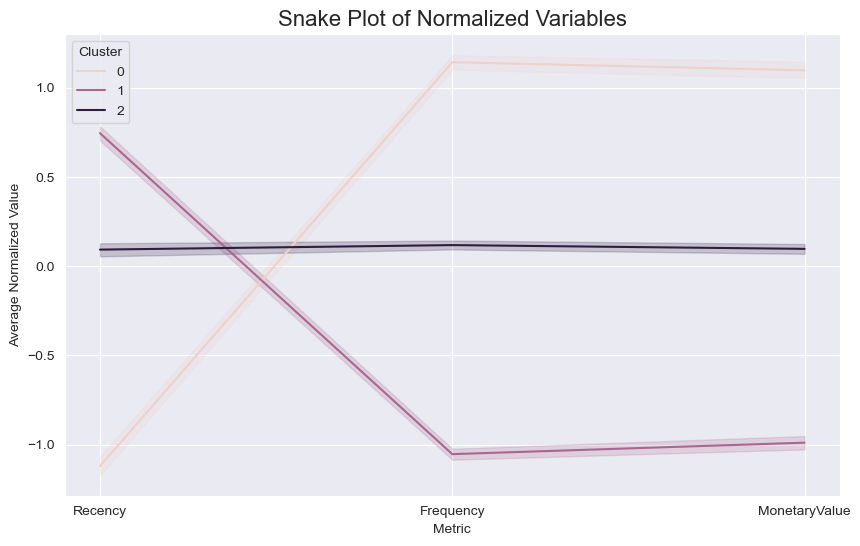

In [15]:
# Assign cluster labels to processed DataFrame
df_processed_clustered = df_processed.assign(Cluster= cluster_labels)

# Melt the normalized Dataframe and reset the index
# .melt() transforms the data from wide to long format, which makes plotting easier
df_processed_melt = pd.melt(df_processed_clustered.reset_index(),
                           # Assign the cluster labelss as the ID
                           id_vars = ['Cluster'],
                           # Assign clustering variables as values
                           value_vars = df_features.columns,
                           # Name the variable and value
                           var_name = "Metric",
                           value_name = "Value")

# Change the figure size
plt.figure(figsize = (10,6))

# Add label and titles to the plt
plt.title('Snake Plot of Normalized Variables', fontsize= 16)
plt.xlabel('Metric')
plt.ylabel('Average Normalized Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data = df_processed_melt, x = 'Metric', y = "Value", hue = 'Cluster')
plt.show()

What does this mean?

#### Create a Heatmap of Relative Importances

Another technique to help visualize how each segment is disctinct is to plot the relative importance. To achives this do the following:
* First, it calculates the average values for each cluster
* Next, it calcualstes the averages values for the total population
* It then divides the cluster averages by the population averages and subtracts one.

          Recency  Frequency  MonetaryValue
Cluster                                    
0       -0.821667   1.677158       1.834177
1        0.842322  -0.838030      -0.856942
2       -0.147164  -0.341965      -0.417382


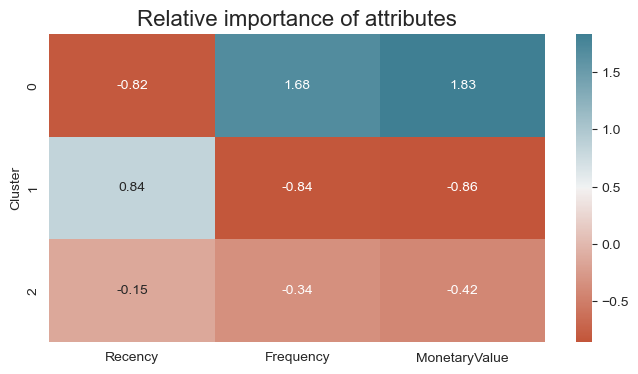

In [16]:
# Calculate average RFM values for each cluster
cluster_avg = df_clusterd.groupby(['Cluster'])[columns_for_clustering].mean()

# Calculate average RFM values for total customer population
population_avg = df[columns_for_clustering].mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg/population_avg - 1

# Print relative importance
print(relative_imp)

# Change the figure size
plt.figure(figsize=(8, 4))

# Add the plot title
plt.title("Relative importance of attributes", fontsize=16)

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

### Clustering the Data where k = 2

In [17]:
# Chosse number of clusters
k = 2

# Initialize KMeans
kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit(df_processed)

# Extract cluster labels
cluster_labels  = kmeans.labels_

# Create a new DataFrame by adding a new cluster column to the original data
df_clusterd = df.assign(Cluster = cluster_labels)

# Group the data by cluster and calculate the total number of rows per group
df_sizes = df_clusterd.groupby(['Cluster'], as_index =False).size()

# Inspect the raw counts
df_sizes

,Cluster,size
0,0,2023
1,1,1620


In [18]:
# Calculate the mean of feature columns by cluster
df_means = df_clusterd.groupby(['Cluster'])[df_features.columns].mean().round(0).reset_index()

df_means

,Cluster,Recency,Frequency,MonetaryValue
0,0,137.0,5.0,92.0
1,1,32.0,35.0,719.0


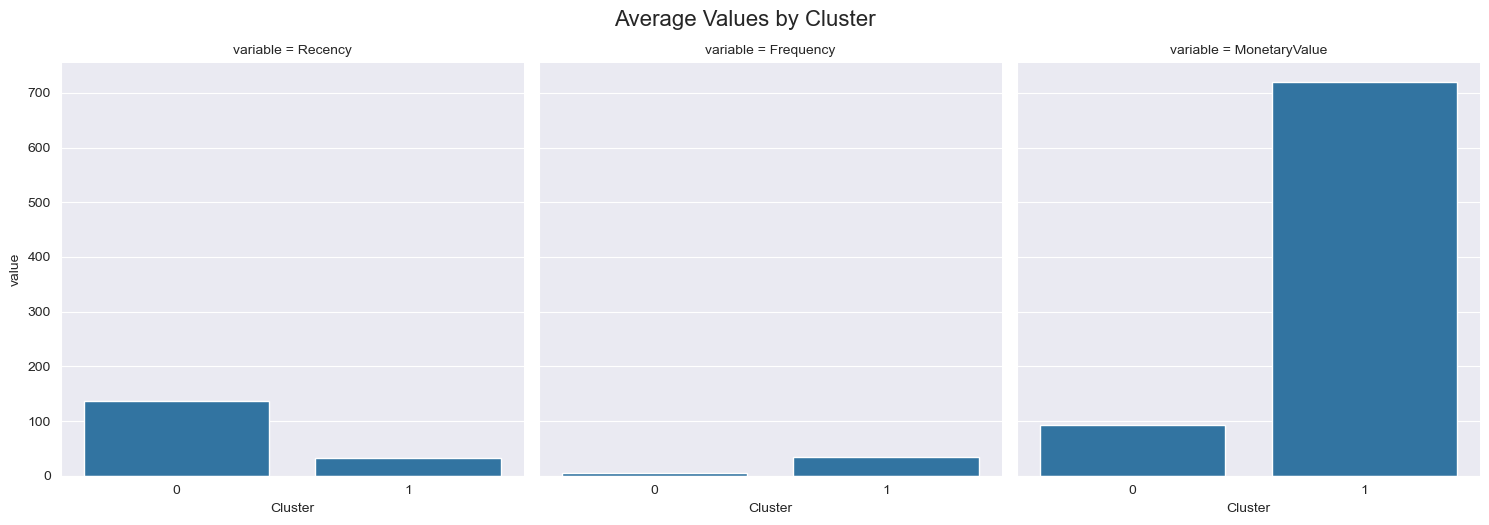

In [19]:
# Plot the distributions of the selected variables
sns.catplot(data = df_means.melt(id_vars = 'Cluster'),
            col = 'variable', x = 'Cluster', y = 'value', kind = 'bar')

# Add a title
plt.suptitle('Average Values by Cluster', y = 1.04, fontsize = 16)

plt.show()

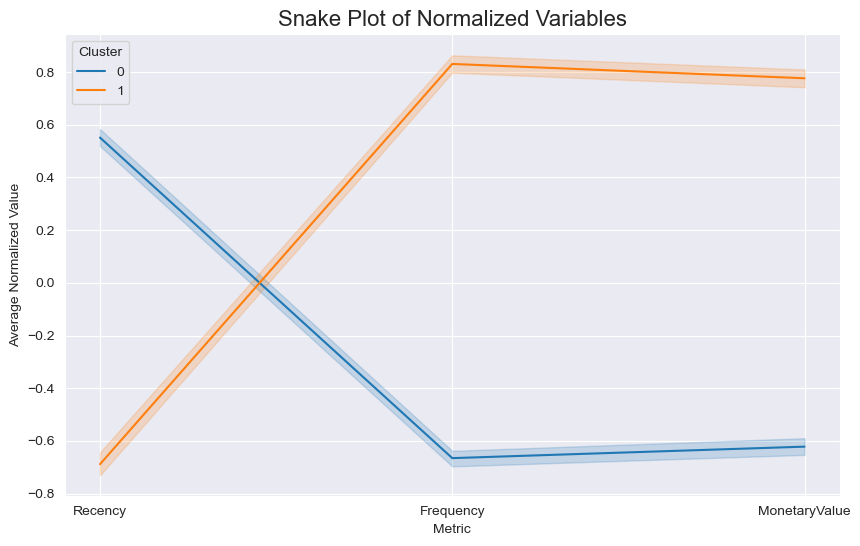

In [20]:
# Assign cluster labels to processed DataFrame
df_processed_clustered = df_processed.assign(Cluster= cluster_labels)

# Melt the normalized Dataframe and reset the index
# .melt() transforms the data from wide to long format, which makes plotting easier
df_processed_melt = pd.melt(df_processed_clustered.reset_index(),
                           # Assign the cluster labelss as the ID
                           id_vars = ['Cluster'],
                           # Assign clustering variables as values
                           value_vars = df_features.columns,
                           # Name the variable and value
                           var_name = "Metric",
                           value_name = "Value")

# Change the figure size
plt.figure(figsize = (10,6))

# Add label and titles to the plt
plt.title('Snake Plot of Normalized Variables', fontsize= 16)
plt.xlabel('Metric')
plt.ylabel('Average Normalized Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data = df_processed_melt, x = 'Metric', y = "Value", hue = 'Cluster')
plt.show()

          Recency  Frequency  MonetaryValue
Cluster                                    
0        0.518229   -0.71481      -0.752188
1       -0.647147    0.89263       0.939307


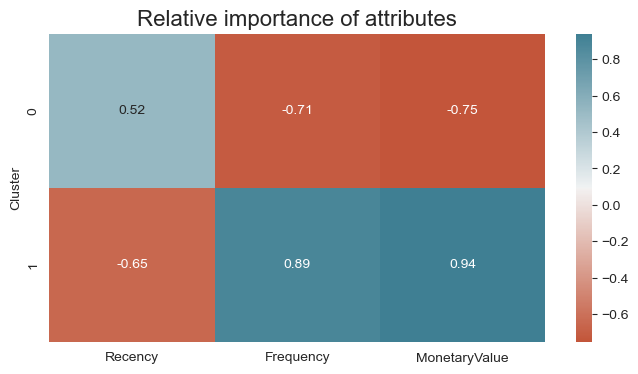

In [21]:
# Calculate average RFM values for each cluster
cluster_avg = df_clusterd.groupby(['Cluster'])[columns_for_clustering].mean()

# Calculate average RFM values for total customer population
population_avg = df[columns_for_clustering].mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg/population_avg - 1

# Print relative importance
print(relative_imp)

# Change the figure size
plt.figure(figsize=(8, 4))

# Add the plot title
plt.title("Relative importance of attributes", fontsize=16)

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

## Using Silhouette ceofficient for choosing the number of clusters

For n_clusters = 2 The average silhouette_score is : 0.38951947314000934
For n_clusters = 3 The average silhouette_score is : 0.30102444457840466
For n_clusters = 4 The average silhouette_score is : 0.29696457845725827
For n_clusters = 5 The average silhouette_score is : 0.2828872210521513
For n_clusters = 6 The average silhouette_score is : 0.2777520126650093
For n_clusters = 7 The average silhouette_score is : 0.2634434654647609


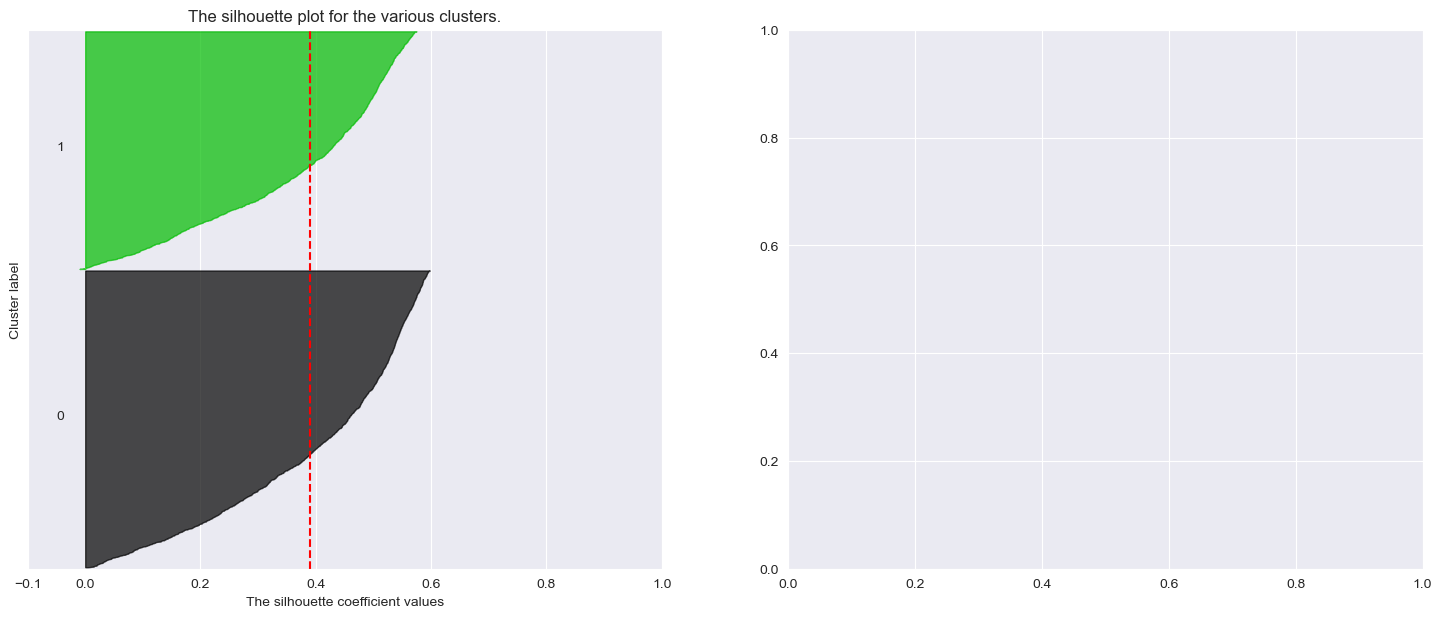

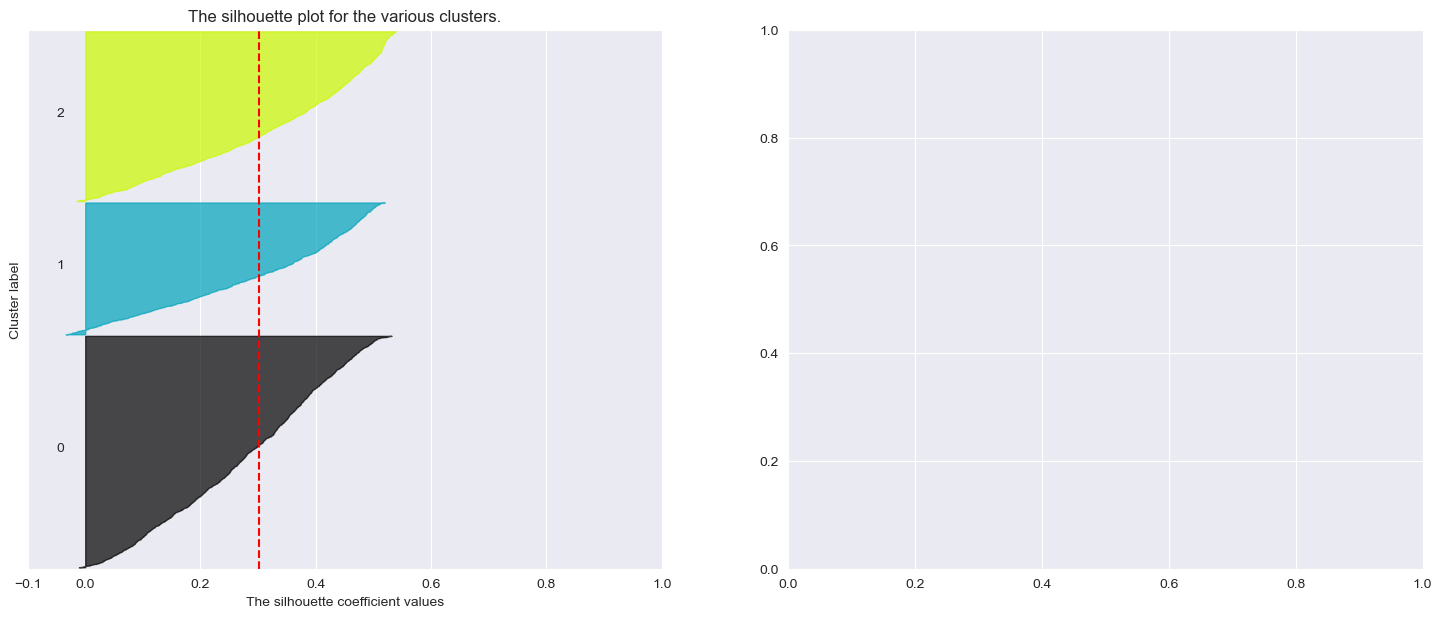

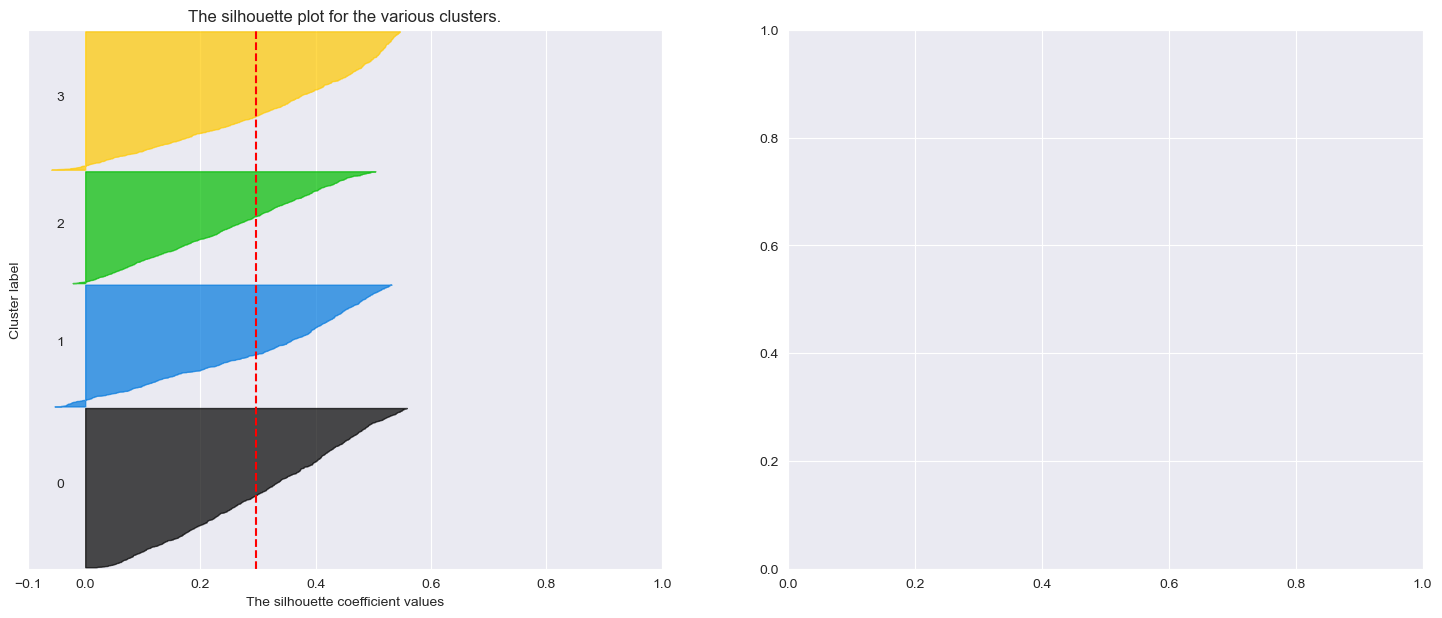

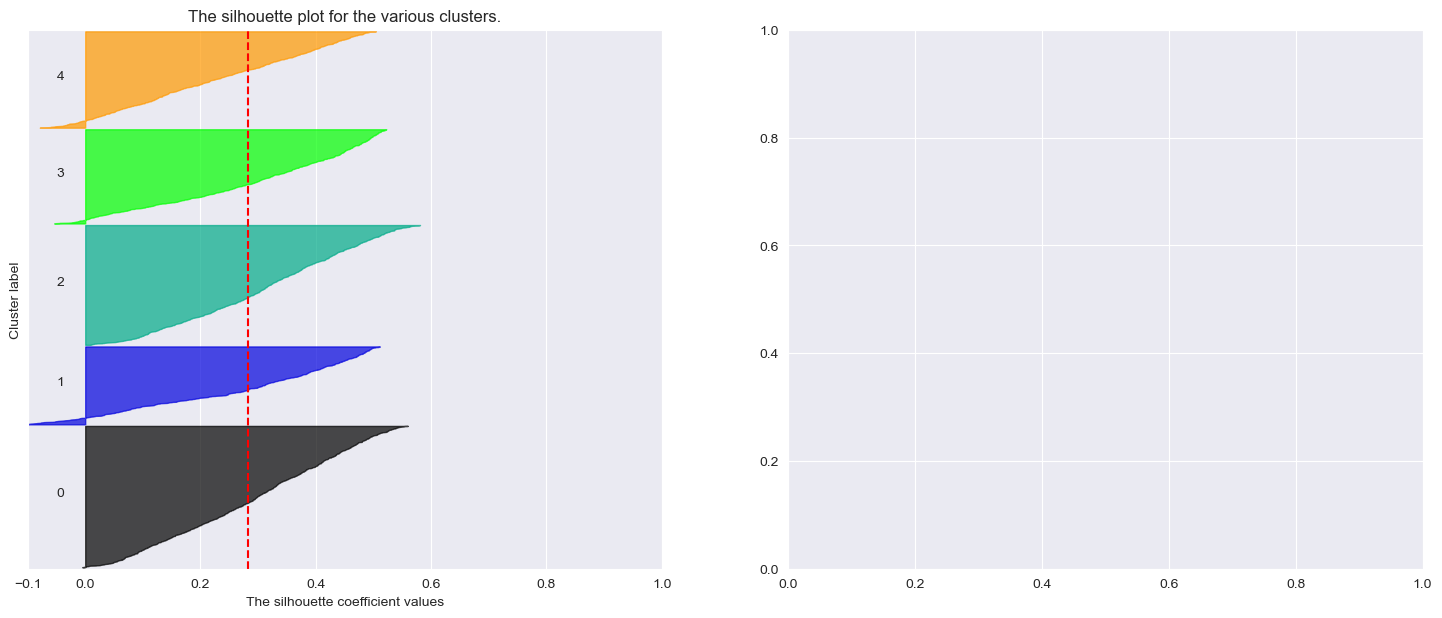

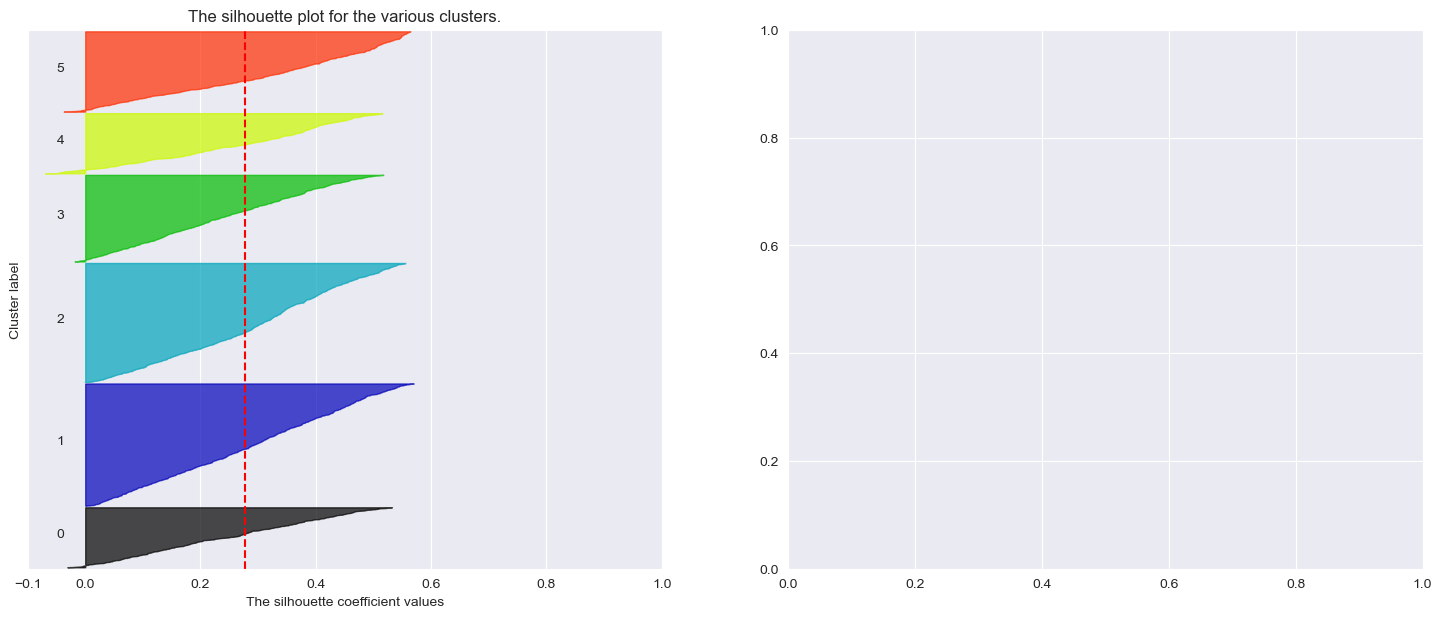

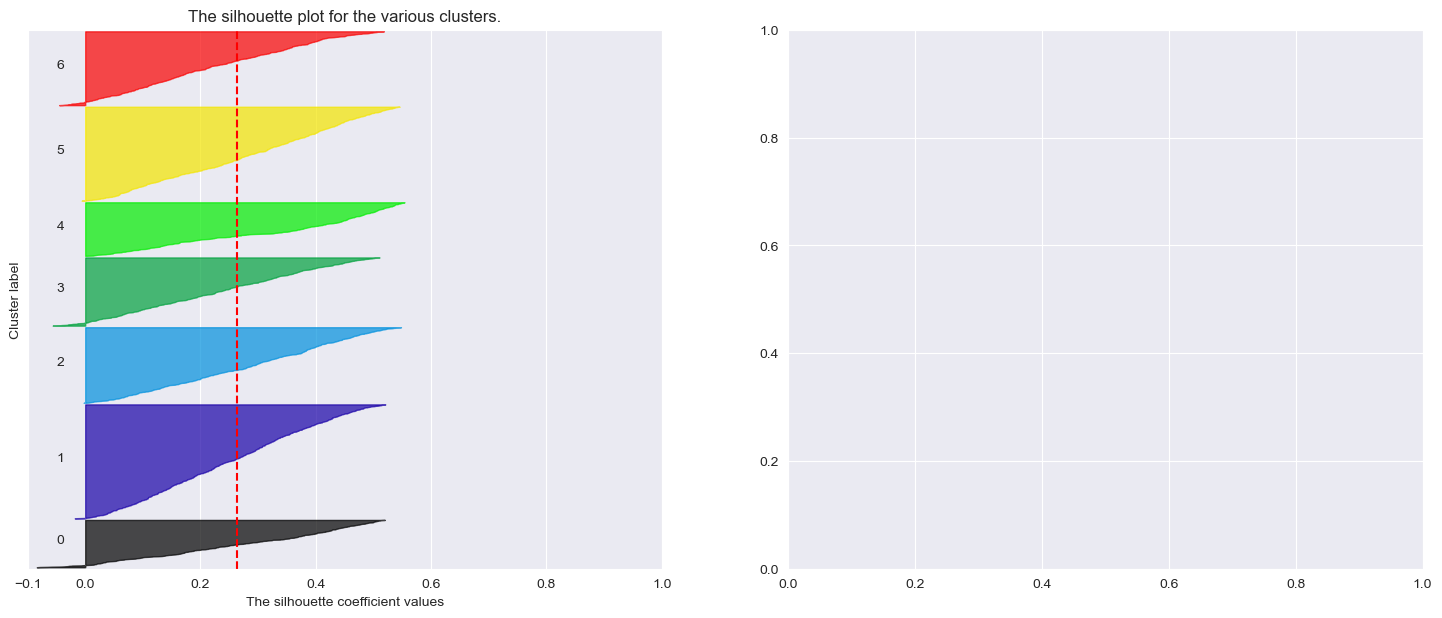

In [22]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

X = df_processed

range_n_clusters = [2,3,4,5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init= 10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
plt.show()

In [26]:
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init= 10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )


For n_clusters = 2 The average silhouette_score is : 0.38951947314000934
For n_clusters = 3 The average silhouette_score is : 0.30102444457840466
For n_clusters = 4 The average silhouette_score is : 0.29696457845725827
For n_clusters = 5 The average silhouette_score is : 0.2828872210521513
For n_clusters = 6 The average silhouette_score is : 0.2777520126650093


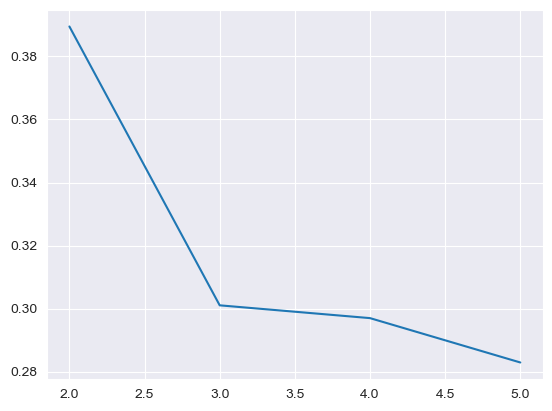

In [24]:
silhouettes = []
kmin = 2
kmax = 5

for k in range(kmin, kmax+1):
# We fit the KMeans algo with k clusters
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 10)
    labels = kmeans.fit_predict(X)
    # We calculate the silhouette score and append it to the silhouette list
    silhouettes.append(silhouette_score(X, labels, metric = 'euclidean'))
    
plt.plot(range(kmin,kmax+1),silhouettes)
plt.show()


2 seems to be optimal number of clusters

## Conclusion

The elbow criterion plot for RFM data advised 2 clusters, therefore, we should at least build segmentation based on 2 and 3 clusters, and compare the outputs. The silhouette method also recommended 2 clusters.
As we can see, the 3 segment solution still has more story to it. While it does identify the least attractive segments and cluster number 1, it does break down the higher value segments into two: segment zero and segment two. It's up to the analyst and the business partners to review the segments and make the call on which solutions make more sense. 